# Importing libraries

In [26]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load csv in a database and extract data

In [2]:
conn = sqlite3.connect('test.db')
c = conn.cursor()

In [121]:
df = pd.read_csv('NYMEX_DL_CL1!, 1M_cebcf.csv')
df.to_sql('CL', con=conn)

,time,open,high,low,close,21 SMMA,50 SMMA,100 SMMA,200 SMMA,EMA(2),...,Leading Span A,Leading Span B,SuperTrend,Supertrend HTF,Supertrend HTF Trend Up,Supertrend HTF Trend Down,Volume,Volume MA,3 Line Strike Up,ATR
0,878511600,21.18,21.35,18.96,19.15,20.316856,20.364830,20.973227,NaN,19.752711,...,NaN,NaN,19.361545,19.945898,NaN,NaN,765808,911359.90,0,2.459947
1,880930800,18.70,19.00,17.50,17.64,20.189386,20.310333,20.939895,NaN,18.344237,...,NaN,NaN,24.427456,20.417839,NaN,20.417839,748499,900205.80,0,2.402094
2,883609200,17.68,18.06,15.70,17.21,20.047511,20.248327,20.902596,NaN,17.588079,...,NaN,NaN,23.224852,18.659077,NaN,NaN,1157394,909163.40,0,2.399087
3,886374000,16.78,17.20,15.20,15.44,19.828106,20.152160,20.847970,NaN,16.156026,...,NaN,NaN,22.487229,18.659077,NaN,NaN,945070,917492.45,0,2.371295
4,888793200,15.59,17.50,12.80,15.61,19.627243,20.061317,20.795590,NaN,15.792009,...,NaN,NaN,21.431044,16.539454,NaN,NaN,1354735,946141.30,0,2.537631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1654034400,115.40,123.68,101.53,105.76,69.588785,65.108900,62.481150,53.336264,107.350580,...,15.4775,18.29,72.244826,106.224864,NaN,NaN,6865835,8625609.30,0,15.035615
296,1656626400,106.01,111.45,90.56,98.62,70.971224,65.779122,62.842538,53.562683,101.530193,...,15.4775,18.29,72.244826,106.224864,NaN,NaN,6861800,8582884.25,0,15.453785
297,1659304800,98.46,98.65,85.73,89.55,71.855928,66.254539,63.109613,53.742619,93.543398,...,15.4775,18.29,72.244826,109.226475,NaN,109.226475,7305975,8597083.95,0,15.272801
298,1661983200,88.83,90.39,76.25,79.49,72.219455,66.519248,63.273416,53.871356,84.174466,...,15.4775,18.29,72.244826,101.015153,NaN,NaN,6405270,8506929.35,0,15.191886


## Correzione timestamp

In [122]:
s_time = pd.to_datetime(df['time'], unit='s')

In [124]:
df = pd.read_sql('SELECT open,high,low,close FROM CL', conn)
df

,open,high,low,close
0,21.18,21.35,18.96,19.15
1,18.70,19.00,17.50,17.64
2,17.68,18.06,15.70,17.21
3,16.78,17.20,15.20,15.44
4,15.59,17.50,12.80,15.61
...,...,...,...,...
295,115.40,123.68,101.53,105.76
296,106.01,111.45,90.56,98.62
297,98.46,98.65,85.73,89.55
298,88.83,90.39,76.25,79.49


## Creazione due collone per ulteriori info utili

In [125]:
#Profitt loss
pl = df['close']-df['open']
df['p/l'] = pl
#Variance in one month
va = df['high']-df['low']
df['va'] = va
#time
df['time'] = s_time
df.head(10)

,open,high,low,close,p/l,va,time
0,21.18,21.35,18.96,19.15,-2.03,2.39,1997-11-02 23:00:00
1,18.70,19.00,17.50,17.64,-1.06,1.50,1997-11-30 23:00:00
2,17.68,18.06,15.70,17.21,-0.47,2.36,1997-12-31 23:00:00
3,16.78,17.20,15.20,15.44,-1.34,2.00,1998-02-01 23:00:00
4,15.59,17.50,12.80,15.61,0.02,4.70,1998-03-01 23:00:00
5,15.77,16.57,14.95,15.39,-0.38,1.62,1998-03-31 23:00:00
6,15.50,16.30,14.13,15.20,-0.30,2.17,1998-04-30 22:00:00
7,15.03,15.56,11.42,14.18,-0.85,4.14,1998-05-31 22:00:00
8,14.20,15.00,13.55,14.21,0.01,1.45,1998-06-30 22:00:00
9,14.10,14.25,12.56,13.34,-0.76,1.69,1998-08-02 22:00:00


# Correzione errori con le date (mesi)

In [126]:
my_list =  pd.to_datetime(df['time'], format='%Y-%m-%d')
year = my_list.dt.year
day = my_list.dt.day
fake_month = my_list.dt.month

0      11
1      11
2      12
3       2
4       3
       ..
295     5
296     6
297     7
298     8
299    10
Name: time, Length: 300, dtype: int64

In [148]:
import numpy as np
y = np.zeros(300)
m = np.zeros(300)
for i in range(300):
    if day[i]>5:
        y[i] = year[i]
        m[i] = fake_month[i] + 1
        #print(year[i],day[i],fake_month[i],m[i],y[i])
    else:
        y[i] = year[i]
        m[i] = fake_month[i]
    if m[i]==13:
        y[i] = year[i] + 1
        m[i] = 1
        #print(year[i],day[i],fake_month[i],m[i],y[i])
df['year']=y
df['month']=m

In [147]:
df.head(1)

,open,high,low,close,p/l,va,time,year,month
0,21.18,21.35,18.96,19.15,-2.03,2.39,1997-11-02 23:00:00,1997.0,11.0


# Creazione Tabella riassuntiva performance
## Mese da 0 a 11 (Gennaio - Dicembre)
## Da anno 1998 a 2021

In [134]:
#mettiamo tutti i passaggi assieme
df_corr=pd.DataFrame()
for i in range(1998,2021,1):
    filtered_df = df[df['year'] == i]
    df_corr[i] = list(filtered_df['p/l'])
df_corr.T

,0,1,2,3,4,5,6,7,8,9,10,11
1998,-0.47,-1.34,0.02,-0.38,-0.30,-0.85,0.01,-0.76,2.89,-1.83,-3.28,0.88
1999,0.58,-0.52,4.36,2.26,-1.66,2.75,1.38,1.56,2.60,-2.90,2.61,1.30
2000,2.57,2.65,-3.70,-1.15,3.55,3.03,-3.15,5.55,-2.19,1.24,0.65,-7.10
2001,1.45,-1.53,-1.05,2.11,-0.13,-2.00,-0.10,0.55,-3.62,-1.62,-1.74,0.44
2002,-0.52,2.38,4.45,0.83,-1.90,1.60,0.22,1.92,1.78,-3.38,-0.33,4.38
2003,1.96,3.27,-4.81,-4.60,3.56,0.70,0.42,0.77,-2.08,0.06,1.18,2.26
2004,0.65,2.96,-0.40,1.56,2.49,-3.35,6.75,-1.57,7.53,2.12,-2.69,-5.62
2005,5.10,3.54,3.63,-5.48,2.69,4.55,3.97,8.43,-2.46,-6.44,-2.44,3.61
2006,6.88,-6.32,5.05,5.63,-0.46,2.72,0.45,-4.14,-7.44,-4.07,4.53,-1.80
2007,-2.84,3.90,4.05,0.01,-1.65,6.45,7.69,-3.90,7.76,12.78,-6.44,7.19


In [135]:
#Corr tra i mesi diversi con un anno di differenza
for i in range(11):
    r = np.corrcoef(df_corr.iloc[i], df_corr.iloc[i+1])
    print((r[0][1]).round(2))

-0.23
0.18
0.24
-0.04
0.41
-0.29
0.14
0.11
0.54
0.51
0.58


In [136]:
df_corr.iloc[0]

1998    -0.47
1999     0.58
2000     2.57
2001     1.45
2002    -0.52
2003     1.96
2004     0.65
2005     5.10
2006     6.88
2007    -2.84
2008    -4.30
2009    -2.04
2010    -6.74
2011     0.88
2012    -1.22
2013     5.71
2014    -1.01
2015    -5.52
2016    -3.98
2017    -1.39
2018     4.53
2019     7.99
2020   -10.04
Name: 0, dtype: float64

In [137]:
df_corr.iloc[0].mean()

-0.07695652173913034

<AxesSubplot:xlabel='2008', ylabel='2009'>

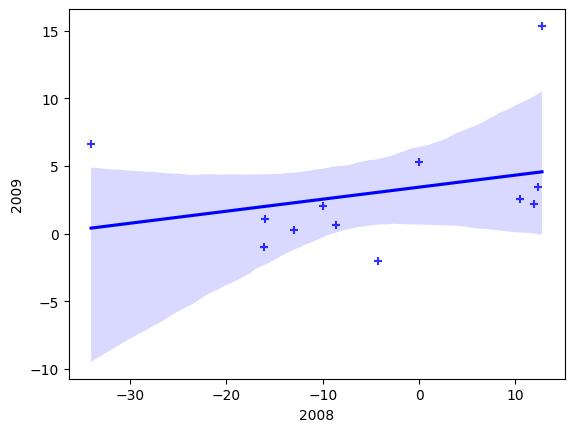

In [138]:
import seaborn as sns
i=10
sns.regplot(x=df_corr.T.iloc[i], y=df_corr.T.iloc[i+1], marker="+",fit_reg=True, color='blue')

In [139]:
df_corr.head(1)

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,-0.47,0.58,2.57,1.45,-0.52,1.96,0.65,5.1,6.88,-2.84,...,0.88,-1.22,5.71,-1.01,-5.52,-3.98,-1.39,4.53,7.99,-10.04


## Grafico andamento medio annualizzato 1998-2021

In [140]:
my_list = np.zeros(12)
for i in range(12):
    my_list[i] = df_corr.iloc[i].mean()
my_list

array([-0.07695652,  1.70826087,  0.57043478,  1.97478261,  0.09956522,
        1.9073913 , -0.46      , -0.05695652, -0.89      , -2.07434783,
       -1.20043478,  0.19434783])

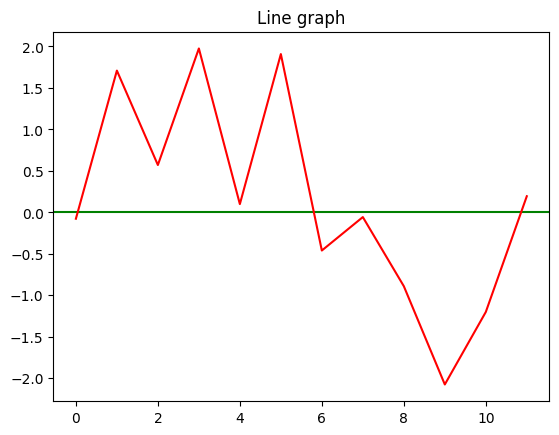

In [141]:
plt.title("Line graph")

x=np.arange(12)
y=my_list
plt.axhline(0, c='green')
plt.plot(x, y, color="red")

plt.show()

In [142]:
df_corr.T.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
1998,-0.47,-1.34,0.02,-0.38,-0.3,-0.85,0.01,-0.76,2.89,-1.83,-3.28,0.88


In [143]:
df_corr.T.iloc[0]

0    -0.47
1    -1.34
2     0.02
3    -0.38
4    -0.30
5    -0.85
6     0.01
7    -0.76
8     2.89
9    -1.83
10   -3.28
11    0.88
Name: 1998, dtype: float64

In [144]:
#Corr tra la media dei risultati mensili con i singoli risultati
for i in range(11):
    r = np.corrcoef(df_corr.T.iloc[i], my_list)
    print((r[0][1]).round(2))

0.07
0.32
0.08
0.3
0.5
-0.12
-0.22
0.32
0.25
-0.14
0.89


In [ ]:
#Controllare la corr tra i singoli mesi con il mese medio.
#Estrapolare la percentuale di casi nel quale si verifica una correlazione maggiore 